# INDIA AIR QUALITY DATA ANALYSIS, VISUALISATION AND PREDICTION

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import timeit
import pickle
%matplotlib inline

In [2]:
#import data 
data = pd.read_csv('Dataset/data.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Show first 5 rows
data.head(5)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
#Show last 5 rows
data.tail(5)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Show the columns of the dataset
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [6]:
#basic info of the dataset
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [7]:
#Data Shape
data.shape

(435742, 13)

In [8]:
#Show the sum of null values for each columns
data.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [9]:
# Drop unnecessary column
data.drop(['stn_code','agency','sampling_date','location_monitoring_station','date','pm2_5'],axis=1,inplace=True) 

In [10]:
#replacing similar words
data = data.replace(to_replace ="Industrial Areas", value ="Industrial Area")
data = data.replace(to_replace ="Industrial", value ="Industrial Area")
data = data.replace(to_replace ="Sensitive Areas", value ="Sensitive Area")
data = data.replace(to_replace ="Sensitive", value ="Sensitive Area")
data = data.replace(to_replace ="Residential and others", value ="Residential, Rural and other Areas")
data = data.replace(to_replace ="Residential", value ="Residential, Rural and other Areas")

In [11]:
#Show first 5 rows
data.head(5)

,state,location,type,so2,no2,rspm,spm
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN


CALCULATE TOTAL MISSING VALUES AND THEIR PERCENTAGE

In [12]:
miss = data.isnull().sum().sort_values(ascending=False) 

In [13]:
miss.head()

spm     237387
rspm     40222
so2      34646
no2      16233
type      5393
dtype: int64

Calculate the percent of null values for each columns (sum of null values / total non-null value) *100

In [14]:
#count(returns Non-NAN value)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

In [15]:
missing_data = pd.concat([miss, percent], axis=1, keys=['Null_Values', 'Percent'])

In [16]:
missing_data.head()

,Null_Values,Percent
spm,237387,54.478797
rspm,40222,9.230692
so2,34646,7.951035
no2,16233,3.725370
type,5393,1.237659


Text(0.5, 1.0, 'Percent missing data by factors')

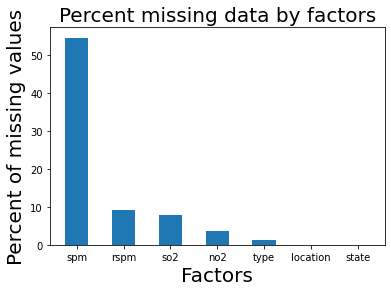

In [17]:
plt.bar(missing_data.index,missing_data['Percent'],width = 0.5)
plt.xlabel('Factors', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by factors', fontsize=20)

In [18]:
#Mean Distribution by State
data.groupby('state')[['spm','rspm','so2','no2']].mean()

,spm,rspm,so2,no2
state,,,,
Andhra Pradesh,200.260378,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,76.629213,3.179104,5.469697
Assam,153.355386,93.724912,6.723263,14.793691
Bihar,276.917416,123.705176,19.381476,36.575525
Chandigarh,206.056150,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,76.536530,8.939587,18.293959
Daman & Diu,145.681416,73.749431,8.192958,16.168926
Delhi,399.402088,196.639771,8.737273,53.489147


FILL MISSING VALUES BY MEAN (GROUP BY STATE)

In [19]:
group_state = data.groupby('state')

In [20]:
def impute_mean_by_state(series):
    return series.fillna(series.mean()) 

In [21]:
#fill value with mean value group by state
data['rspm']=group_state['rspm'].transform(impute_mean_by_state)  
data['so2']=group_state['so2'].transform(impute_mean_by_state)
data['no2']=group_state['no2'].transform(impute_mean_by_state)
data['spm']=group_state['spm'].transform(impute_mean_by_state)

In [22]:
data.describe()

,so2,no2,rspm,spm
count,435739.000000,435739.000000,435739.000000,431671.000000
mean,10.589141,25.663170,109.680907,215.198748
std,10.863679,18.271145,72.519399,117.470157
min,0.000000,0.000000,0.000000,0.000000
25%,4.800000,14.000000,59.000000,142.000000
50%,8.000000,21.800000,93.000000,205.255823
75%,13.000000,32.000000,142.016832,248.000000
max,909.000000,876.000000,6307.033333,3380.000000


In [23]:
#some null value remains since some state have one value(i.e NaN only) and no mean to replace them
data.isna().sum()

state          0
location       3
type        5393
so2            3
no2            3
rspm           3
spm         4071
dtype: int64

In [24]:
data = data.dropna(subset=['so2', 'no2', 'rspm', 'spm'],how='any',axis=0) 

In [25]:
data = data.reset_index(drop=True)

In [26]:
data.isna().sum()

state          0
location       0
type        5390
so2            0
no2            0
rspm           0
spm            0
dtype: int64

In [27]:
#Show first 5 rows
data.head(5)

,state,location,type,so2,no2,rspm,spm
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378


In [28]:
#Show last 5 rows
data.tail(5)

,state,location,type,so2,no2,rspm,spm
431666,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,233.506524
431667,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,233.506524
431668,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,233.506524
431669,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,233.506524
431670,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,233.506524


Calculating AQI from SO2

In [29]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


Calculating AQI from NO2

In [30]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


Calculating AQI from RSPM

In [31]:
def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
data['RSPMi']=data['rspm'].apply(cal_RSPMi)
df= data[['rspm','RSPMi']]
df.head()

,rspm,RSPMi
0,78.182824,78.182824
1,78.182824,78.182824
2,78.182824,78.182824
3,78.182824,78.182824
4,78.182824,78.182824


Calculating AQI from SPM

In [32]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


Calculating the Max AQI among above all

In [33]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi ):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi ):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi']),axis=1)
df= data[['state','SOi','Noi','RSPMi','SPMi','AQI']]
data.drop(['SOi','Noi','RSPMi','SPMi'],axis=1,inplace=True)
df.head()

,state,SOi,Noi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,78.182824,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,78.182824,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,78.182824,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,78.182824,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,78.182824,166.840252,166.840252


In [34]:
data

,state,location,type,so2,no2,rspm,spm,AQI
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,166.840252
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,166.840252
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,166.840252
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,166.840252
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,166.840252
...,...,...,...,...,...,...,...,...
431666,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.000000,233.506524,195.959184
431667,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.000000,233.506524,189.004349
431668,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.000000,233.506524,189.004349
431669,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.000000,233.506524,189.004349


In [35]:
#Feature Selection
correlation = data.corr()

<AxesSubplot:>

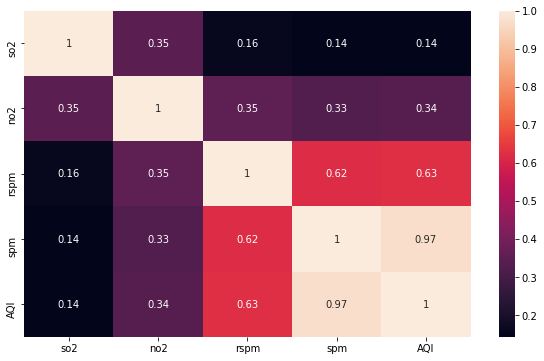

In [36]:
plt.figure(figsize = (10,6))
sns.heatmap(correlation, annot = True)

Training Model using Decision Tree Regressor

In [37]:
model = DecisionTreeRegressor()

In [38]:
X = data[['so2','no2','rspm','spm']]
y = data['AQI']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [40]:
start = timeit.default_timer()
model.fit(X_train,y_train)
stop = timeit.default_timer()

print('Model Training Time: ', stop - start)  

Model Training Time:  0.9704846829999987


In [41]:
model.score(X_test,y_test) 

0.9997884013355846

In [42]:
predictions = model.predict(X_test)

In [43]:
print('Root Mean Squared Error(RMSE):%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))

Root Mean Squared Error(RMSE):1.30 


In [44]:
model.predict([[18.6,48.3,142,285]])

array([235.])

In [45]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00011
Feature: 1, Score: 0.00095
Feature: 2, Score: 0.00932
Feature: 3, Score: 0.98962


NameError: name 'pyplot' is not defined

In [ ]:
model.predict([[2,5.8,17,36]])

In [ ]:
model.predict([[6,11,109,84.41]])

In [ ]:
data

In [ ]:
#data.to_excel('Dataset.xlsx', sheet_name='Sheet1')

In [ ]:
#New DataFrame for statewise data
state_data = data.groupby('state')[['so2','no2','rspm','spm','AQI']].mean()

In [ ]:
state_data

In [ ]:
state_data.to_excel('Statewise-Data.xlsx', sheet_name='Sheet1')

In [ ]:
#New DataFrame for locationwise data
location_data = data.groupby(['location','state'])[['so2','no2','rspm','spm','AQI']].mean()

In [ ]:
location_data

In [ ]:
location_data.to_excel('Locationwise-Data.xlsx', sheet_name='Sheet1')

In [ ]:
#New DataFrame for typewise data
type_data = data.groupby('type')[['so2','no2','rspm','spm','AQI']].mean()

In [ ]:
type_data

In [ ]:
type_data.to_excel('Typewise-Data.xlsx', sheet_name='Sheet1')

In [ ]:
pickle.dump(model,open('model.pkl','wb'))
model_pickle = pickle.load(open('model.pkl','rb'))